# Research and GitHub link

**Previous Research Highlighting Health Conditions Potentially Correlated to Diabetes:**

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3870323/


*   Cardiovascular Diseases
*   Renal Diseases
*   Hypertension
*   Stroke
*   Retinopathy (Blindness)
*   Peripheral Neuropathy

https://www.niddk.nih.gov/health-information/diabetes/overview/symptoms-causes

*   Obesity
*   Hyperthyroidism (Thyroid Diseases)

In [1]:
!git clone https://github.com/tarynrahman99/AppliedVis_Project.git

Cloning into 'AppliedVis_Project'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 4.48 MiB | 3.57 MiB/s, done.
Resolving deltas: 100% (3/3), done.



## Load in the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt


data = pd.read_csv("/content/AppliedVis_Project/diabetic_data_diagnosis.csv")
labels = pd.read_csv("/content/AppliedVis_Project/IDs_mapping.csv")
icd_mapping = pd.read_csv("/content/AppliedVis_Project/CMS32_DESC_LONG_SHORT_DX.csv", encoding='latin-1')


<ipython-input-2-6a65680405d0>:7: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/AppliedVis_Project/diabetic_data_diagnosis.csv")


In [3]:
# @title
# Extract first three digits from 'diag_1', 'diag_2', 'diag_3' columns
data['diag_1_first3'] = data['diag_1'].astype(str).str[:3]

# Extract first three digits from 'DIAGNOSIS CODE' column in icd_mapping
icd_mapping['diag_code_first3'] = icd_mapping['DIAGNOSIS CODE'].astype(str).str[:3]

# Merge with the first three digits of diagnosis codes
data = pd.merge(data, icd_mapping[['diag_code_first3', 'LONG DESCRIPTION']], left_on='diag_1_first3', right_on='diag_code_first3', how='left')
data = data.rename(columns={'LONG DESCRIPTION': 'diag_1_description'})


In [4]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_first3,diag_code_first3,diag_1_description
0,15245874,7436034,Caucasian,Female,[80-90),?,1,3,1,8,...,No,No,No,No,No,Yes,NO,3.0,NaN,NaN
1,44118072,20660841,Other,Female,[80-90),?,6,1,17,3,...,No,No,No,No,No,Yes,NO,3.0,NaN,NaN
2,46242192,10993320,Caucasian,Female,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,NO,3.0,NaN,NaN
3,99745974,24640821,Caucasian,Female,[60-70),?,2,11,4,3,...,No,No,No,No,No,Yes,NO,3.0,NaN,NaN
4,117268386,23872788,Caucasian,Female,[60-70),?,3,1,1,7,...,No,No,No,No,No,No,>30,3.0,NaN,NaN


In [5]:
labels.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


##Hypothesis: The initial diagnosis upon admission may serve as a predictive factor for the likelihood of readmission. This study aims to investigate whether specific diagnoses recorded upon admission are associated with a higher probability of readmission. Additionally, we will assess whether the most prevalent admission diagnoses align with or deviate from expectations established in existing literature regarding readmission risk factors.



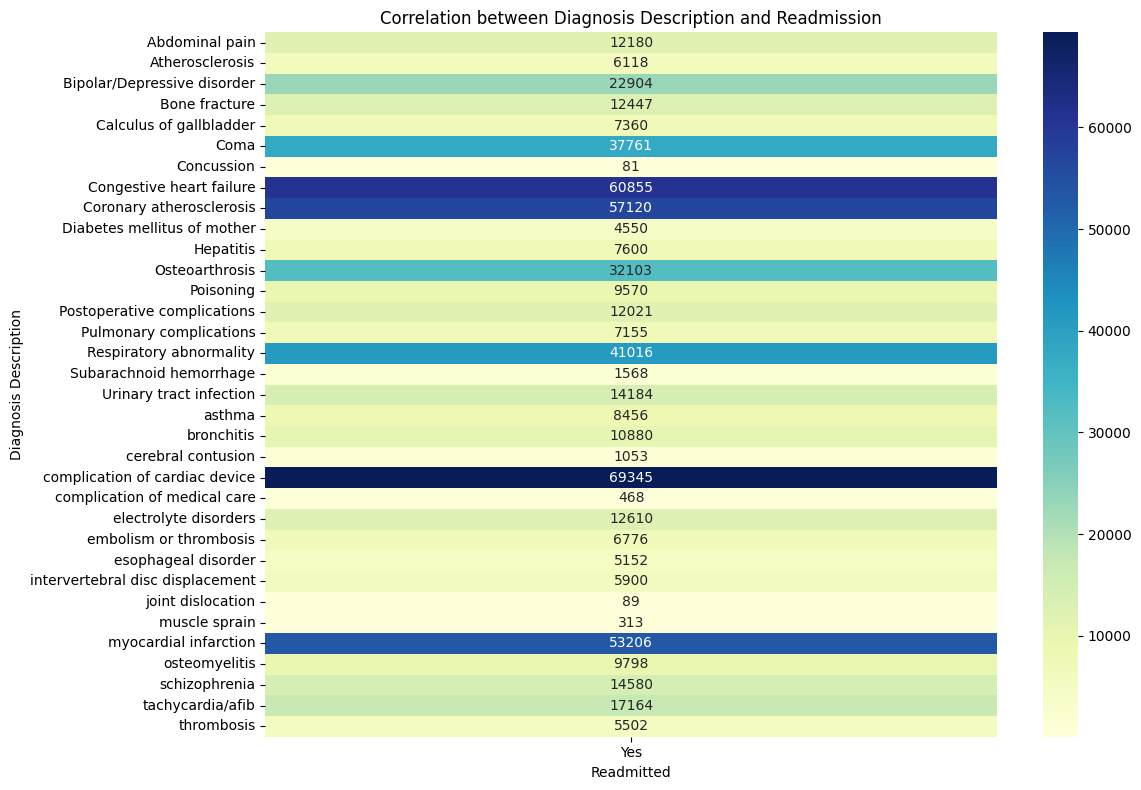

In [6]:
# Remove rows where 'diag_1 description' column has missing or null values
diabetic_data_cleaned = data.dropna(subset=['diag_1 description'])

# Remove rows where 'readmitted' column is 'No'
diabetic_data_cleaned = diabetic_data_cleaned[diabetic_data_cleaned['readmitted'] != 'NO']

# Replace '>30' and '<30' with 'Yes' in 'readmitted' column
diabetic_data_cleaned['readmitted'].replace({'>30': 'Yes', '<30': 'Yes'}, inplace=True)

# Creating a cross-tabulation between 'diag_1 description' and 'readmitted'
cross_tab = pd.crosstab(diabetic_data_cleaned['diag_1 description'], diabetic_data_cleaned['readmitted'])

# Creating a heatmap to visualize the cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, fmt='d')
plt.title('Correlation between Diagnosis Description and Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Diagnosis Description')
plt.tight_layout()
plt.show()

**Analysis Question:** When the 30 most common diagnoses on admission are on a Contingency/Heatmap Plot, what are the most common initial diagnoses?

**Visualization Design:** This visualization Contingency/Heatmap Plots the number of patients readmitted based on their disease category. The number of readmissions for each disease is recorded on each line, and the more patients that each condition has readmitted, the bluer the line becomes.

**Analysis:**  From this graph, cardiac diseases or complications are the most common reasons for admission. Because there are so many individual cardiac diseases in the top 30 most common diagnoses, I decided it would be good to make groups for each condition and plot them.


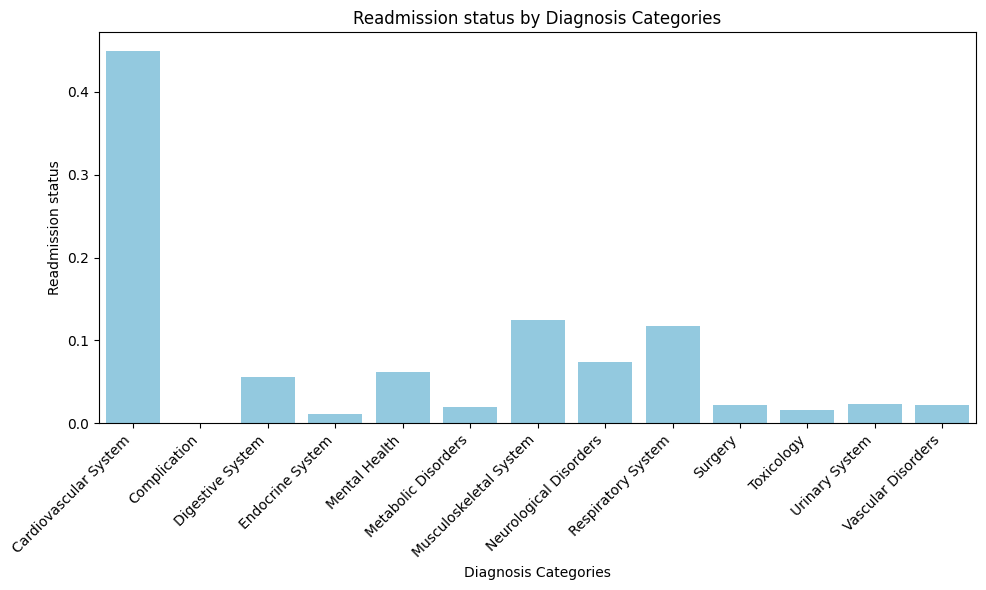

In [7]:
# Dictionary to map specific diagnoses to broader categories
diagnosis_categories = {
    'Abdominal pain': 'Digestive System',
    'Atherosclerosis': 'Cardiovascular System',
    'Bipolar/Depressive disorder': 'Mental Health',
    'Bone fracture': 'Musculoskeletal System',
    'Calculus of gallbladder': 'Digestive System',
    'Coma': 'Neurological Disorders',
    'Concussion': 'Neurological Disorders',
    'Congestive heart failure': 'Cardiovascular System',
    'Coronary atherosclerosis': 'Cardiovascular System',
    'Diabetes mellitus of mother': 'Endocrine System',
    'Hepatitis': 'Digestive System',
    'Osteoarthrosis': 'Musculoskeletal System',
    'Poisoning': 'Toxicology',
    'Postoperative complications': 'Surgery',
    'Pulmonary complications': 'Respiratory System',
    'Respiratory abnormality': 'Respiratory System',
    'Subarachnoid hemorrhage': 'Neurological Disorders',
    'Urinary tract infection': 'Urinary System',
    'asthma': 'Respiratory System',
    'bronchitis': 'Respiratory System',
    'cerebral contusion': 'Neurological Disorders',
    'complication of cardiac device': 'Cardiovascular System',
    'complication of medical care': 'Complication',
    'electrolyte disorders': 'Metabolic Disorders',
    'embolism or thrombosis': 'Vascular Disorders',
    'esophageal disorder': 'Digestive System',
    'intervertebral disc displacement': 'Musculoskeletal System',
    'joint dislocation': 'Musculoskeletal System',
    'muscle sprain': 'Musculoskeletal System',
    'myocardial infarction': 'Cardiovascular System',
    'osteomyelitis': 'Musculoskeletal System',
    'schizophrenia': 'Mental Health',
    'tachycardia/afib': 'Cardiovascular System',
    'thrombosis': 'Vascular Disorders'
}
# Extract unique diagnoses from the dataset's 'diag_1 description' column
unique_diagnoses = data['diag_1 description'].unique()

# Filter out diagnoses that are not present in the dictionary
filtered_diagnoses = [diagnosis for diagnosis in unique_diagnoses if diagnosis in diagnosis_categories]

# Map diagnoses to broader categories using the dictionary for filtered diagnoses
data.loc[data['diag_1 description'].isin(filtered_diagnoses), 'diagnosis_category'] = data.loc[data['diag_1 description'].isin(filtered_diagnoses), 'diag_1 description'].map(diagnosis_categories)

# Grouping data by diagnosis categories and counting readmissions for each group
grouped_data = data.groupby('diagnosis_category')['readmitted'].count().reset_index()

# Calculating readmission rates for each diagnosis category
grouped_data['readmissions'] = grouped_data['readmitted']
grouped_data['total_patients'] = grouped_data['readmissions'].sum()
grouped_data['readmission_rate'] = grouped_data['readmissions'] / grouped_data['total_patients']

# Displaying or plotting the readmission rates by diagnosis categories
# For example, a bar plot showing readmission rates by diagnosis categories
plt.figure(figsize=(10, 6))
sns.barplot(x='diagnosis_category', y='readmission_rate', data=grouped_data, color= 'skyblue')
plt.title('Readmission status by Diagnosis Categories')
plt.xlabel('Diagnosis Categories')
plt.ylabel('Readmission status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Analysis Question:** When the 30 most common diagnoses on admission are grouped into more general categories, are there any unexpectedly represented categories?

**Visualization Design:** This visualization uses a bar chart to show the readmission rates by diagnosis categories. This rate was calculated by taking the total number of readmitted patients and then dividing that number by the total number of patients in the dataset.

**Analysis:**  The diagnosis category most often readmitted is the cardiovascular system, which accounts for more than 40% of the patient readmissions in our dataset. According to our research, this result is not surprising as this is what the literature already shows. Our data, however, indicates that Musculoskeletal and Respiratory systems are the second and third highest categories. This is more surprising, as these did not come up as typical comorbidities for diabetes.


##Hypothesis: Age plays a role in the likelihood of hospital readmission for individuals with chronic conditions. We hypothesize that distinct age groups may exhibit varying rates of hospital readmissions.

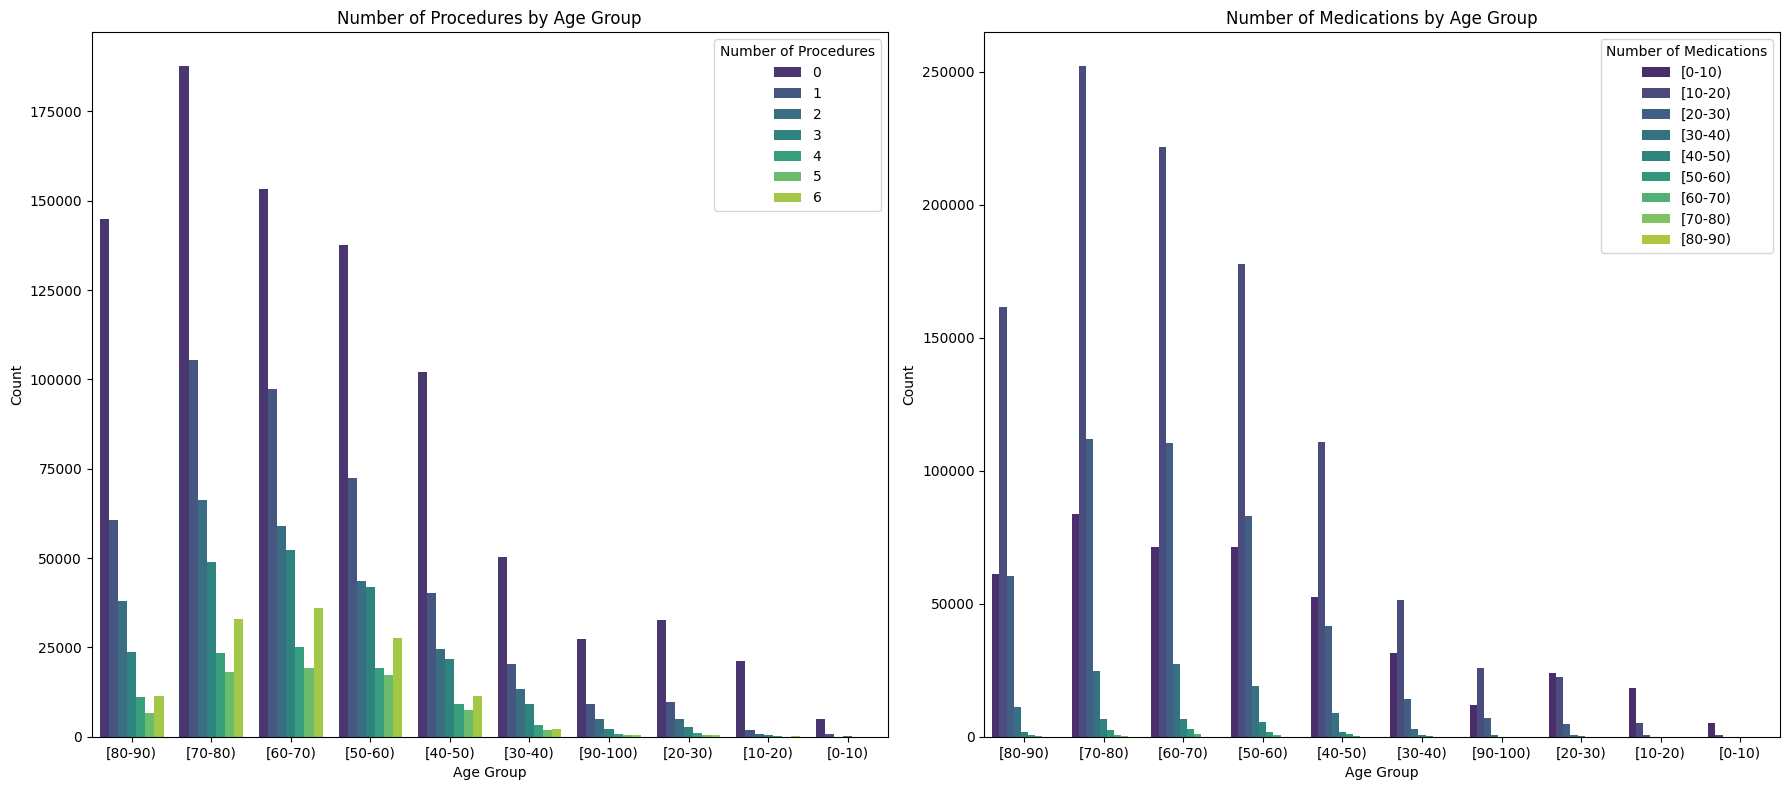

In [8]:
# Plot for Number of Procedures by Age Group
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='age', hue='num_procedures', data=data, palette='viridis')
plt.title('Number of Procedures by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Number of Procedures', loc='upper right')

medications = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)']
data['medication_group'] = pd.cut(data['num_medications'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], labels=medications, right=False)

# Plot for Number of Medications by Age Group
plt.subplot(1, 2, 2)
sns.countplot(x='age', hue='medication_group', data=data, palette='viridis')
plt.title('Number of Medications by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Number of Medications', loc='upper right')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


**Analysis Question:** Are there any apparent relationships between age and number of medications/procedures? Can we identify any trends?

**Visualization Design:** I chose to do a side-by-side grouped bar chart for this visualization. I colored by the variable (procedures or medications) and grouped by age. For the medication data, I created groups of 10 medications to identify trends rather than the frequency of each within the dataset. The color scheme represents categorical data. However, it is a gradient because the data it represents is ordinal. It is also worth noting that the 70-80 age group had the largest number of individuals in the dataset, which can bias the viewer to believe the procedures or medications are higher for a different reason.

**Analysis:** This plot shows the relationship between age and number of medications and procedures. In addition, we can see that the distributions follow a similar trend due to the data distribution. For this plot to be more effective in displaying trends, I would want the bars to show the percentage of age groups within each category so there isn't a skew due to the number of observations.

In [9]:
# Selection
brush = alt.selection_interval(encodings=['x', 'y'])

# Calendar Heatmap
heatmap = alt.Chart(data[1:100]).mark_rect().encode(
    y='age:O',
    x='readmitted:O',
    color=alt.condition(brush, "num_medications:Q", alt.value('lightgray')),
    opacity=alt.condition(brush, alt.value(0.7), alt.value(0.3)),
    tooltip=[
        alt.Tooltip('age:O', title='Age'),
        alt.Tooltip('readmitted:O', title="Readmitted?"),
        alt.Tooltip('average(num_medications):Q', title='Avg Medications')
    ]
).properties(
    width=450,
    height=300,
    title="Average Number of Medications by Age"
).add_selection(
    brush
)

# Bar Chart for Yearly counts
bars = alt.Chart(data[1:100]).mark_bar().encode(
    x='age:O',
    y=alt.Y('sum(num_procedures):Q', title="Total Procedures")
).transform_filter(
    brush
).properties(
    width=450,
    height=300,
    title="Total Procedures by Age"
)

# Combine the views
combined_chart = heatmap | bars
combined_chart

alt.HConcatChart(...)

**Analysis Question:** How do the number of medications vary by admission status and age? Is there a trend between the number of medications and procedures?

**Visualization Design:** For this design, I created a heatmap that compares age and readmission status by the average number of medications an individual is on. In addition, there is a component of interactivity as the user can brush over elements on the heatmap and see how the total number of procedures for that group is distributed by age. While the age variable is an axis in both plots, age is a variable that may show/explain some trends in the data.

**Analysis:** From this plot, we can see that the highest average of medications occurs in the 70-80 age group and the <30 readmitted group. However, if we select the <30 readmitted group, we can see that the total number of procedures is higher in the 50-60 age group. This is an interesting thing to note from the plot.



In [10]:
#Heatmap for Average Time Spent in Hospital by Age
# Selection
brush = alt.selection_interval(encodings=['x', 'y'])

# Calendar Heatmap
heatmap = alt.Chart(data[1:100]).mark_rect().encode(
    y='age:O',
    x='readmitted:O',
    color=alt.condition(brush, "time_in_hospital:Q", alt.value('lightgray')),
    opacity=alt.condition(brush, alt.value(0.7), alt.value(0.3)),
    tooltip=[
        alt.Tooltip('age:O', title='Age'),
        alt.Tooltip('readmitted:O', title="Readmitted?"),
        alt.Tooltip('average(time_in_hospital):Q', title='Avg Time in Hospital')
    ]
).properties(
    width=600,
    height=400,
    title="Average Time in Hospital by Age"
).add_selection(
    brush
)
heatmap

alt.Chart(...)

**Analysis Question:** How does the average time spent in the hospital vary by age? What is the relationship between these variables and readmission status?

**Visualization Design:** This visualization employs an interactive calendar heatmap to explore the relationship between age, readmission status, and average time spent in the hospital. The selection brush enhances interactivity, allowing users to focus on specific data subsets, while the color gradient represents average hospital time. The compact layout, limited data display, and informative tooltips provide a concise and insightful representation of these multidimensional variables. Overall, the design facilitates a quick understanding of patterns in the data and supports efficient exploration.

**Analysis:**  The strongest correlation is seen under the 70-80 year old range with no readmissions. When scrolling over, due to Altair’s feature, it is seen that the average time spent in the hospital was 14 hours. The least strong correlation is seen under that 10-20 year-old age range that was not readmitted, with an average time spent in the hospital of 1 hour.  

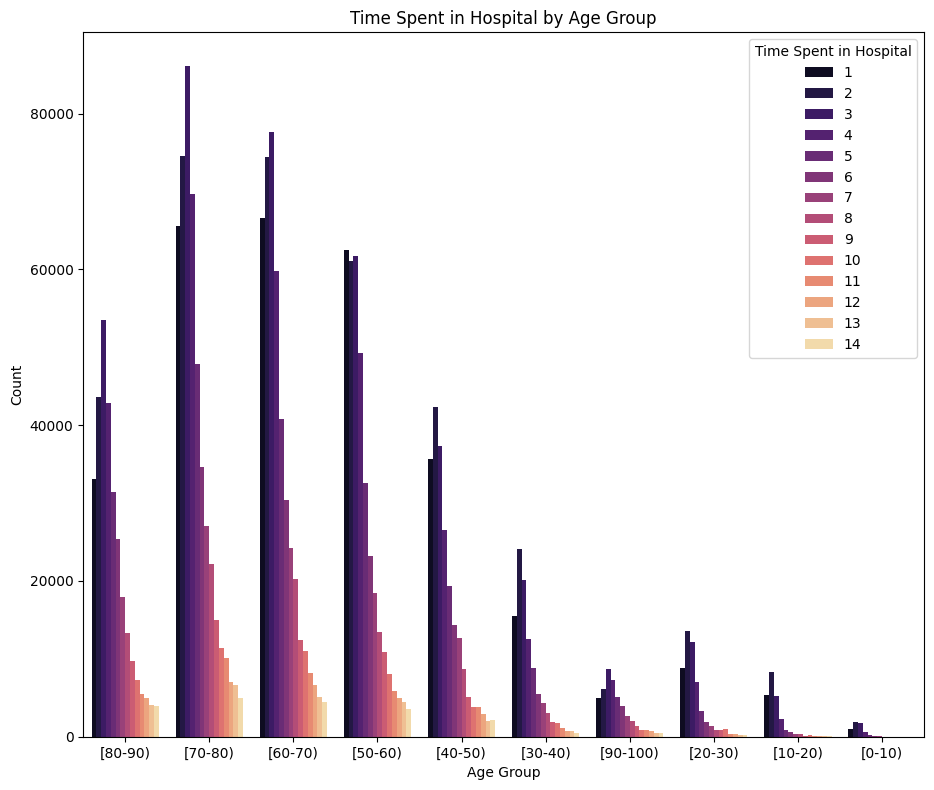

In [11]:
# Plot for Number of Procedures by Age Group
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='age', hue='time_in_hospital', data=data, palette='magma')
plt.title('Time Spent in Hospital by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Time Spent in Hospital', loc='upper right')

plt.tight_layout()
plt.show()

#consider violin chart

**Analysis Question:** How does the time spent in the hospital vary by age?

**Visualization Design:** The side-by-side bar plot illustrates the distribution of individuals across different age groups based on varying durations of hospitalization. Each age category is represented by a bar, further divided into segments corresponding to distinct time intervals spent in the hospital. The color-coded legend aids in understanding the specific hospitalization times associated with each color. The visualization enables a quick comparison of how the distribution of hospitalization times varies across different age groups, offering insights into potential patterns or trends within the dataset. The layout and labeling contribute to the clarity and interpretability of the plot.

**Analysis:** This plot allows for an understanding of time spent in the hospital by age group before considering re-admission status. Evidently, the highest count of time spent in the hospital is 3 hours within the 70-80 year old age range.  



##Hypothesis: Changes in medication during hospital admission may impact the likelihood of readmissions for patients with diabetic conditions. This study aims to investigate whether changes in medication regimens or insulin levels during hospitalization correlate with an increased or decreased probability of readmission, thereby providing insights into the potential influence of medication adjustments on hospital readmission rates among patients with chronic illnesses.

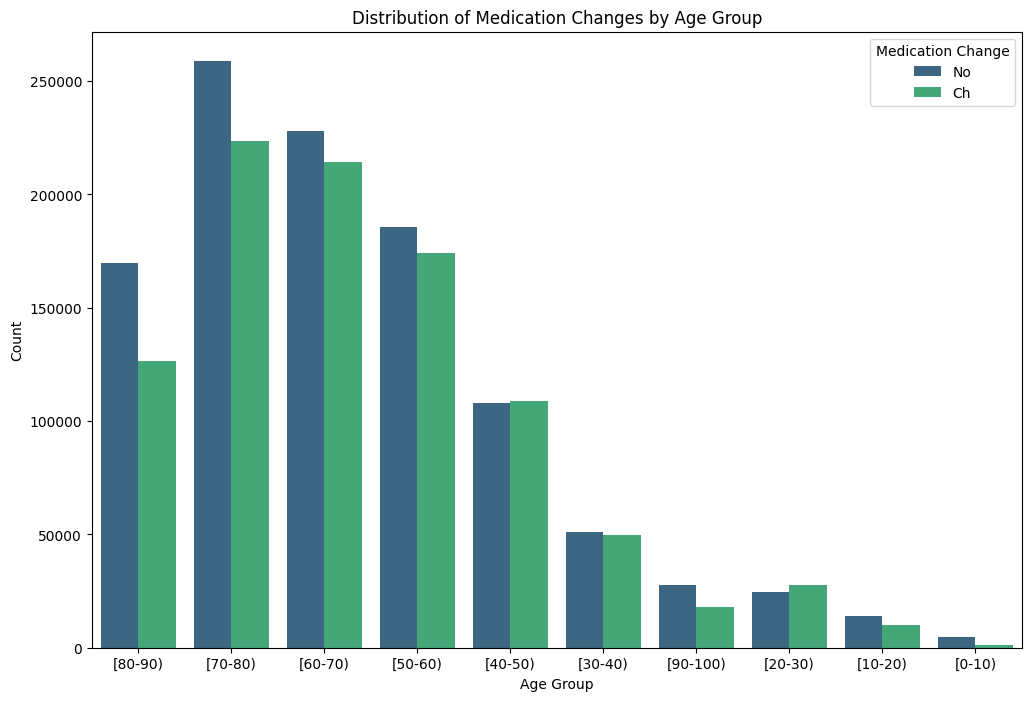

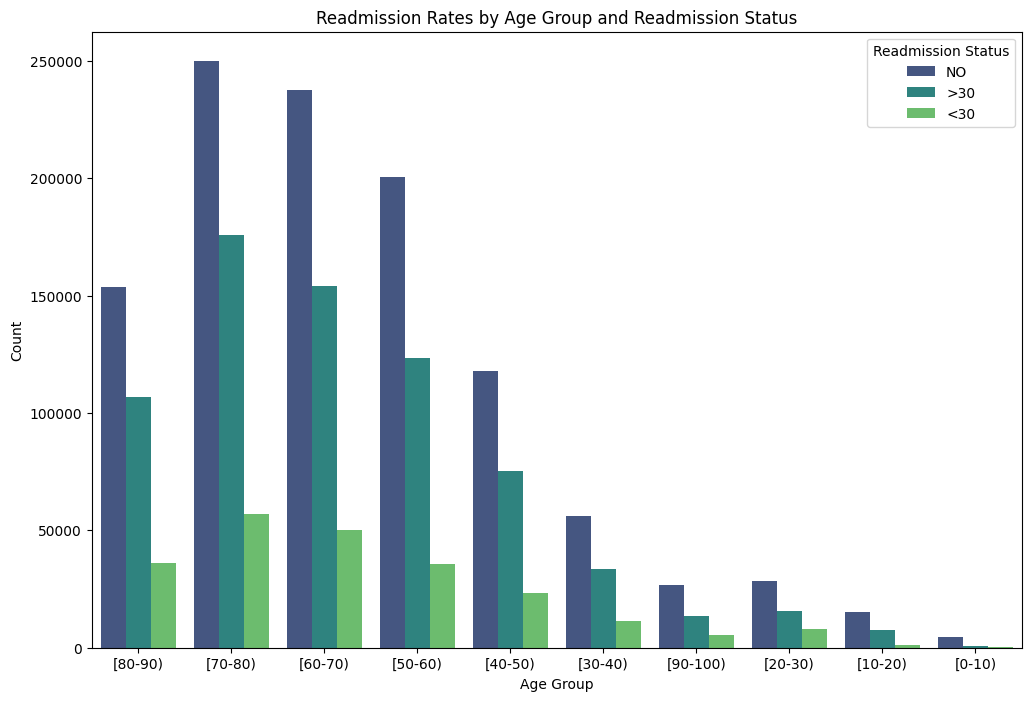

In [12]:
#look at whether the impact of changing medications on readmission varies across different age groups.
# Create a bar plot for the distribution of medication changes by age group
plt.figure(figsize=(12, 8))
sns.countplot(x='age', hue='change', data=data, palette='viridis')
plt.title('Distribution of Medication Changes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Medication Change', loc='upper right')
plt.show()

# Create a stacked bar plot for readmission rates by age group and readmission status
plt.figure(figsize=(12, 8))
sns.countplot(x='age', hue='readmitted', data=data, palette='viridis')
plt.title('Readmission Rates by Age Group and Readmission Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Readmission Status', loc='upper right')
plt.show()

**Analysis Question:** How is whether an indivdual has changed medications or not distributed by age? How does readmission status vary by age group?

**Visualization Design:** Using a grouped bar chart, we can compare the actual number of observations in each group (medication change/readmission status), varying by age group. Coloring the groups also allows for the trends to be more obviously visible. Using the raw numbers allows us to see true distributions. However, we know there are not equal numbers within each age group. It would be interesting to see the distributions as percentages so that the raw counts do not add any skewness.

**Analysis:** From the first plot, we see that the two medication change groups follow similar distributions among each age group. In addition, we can see that the difference in the number of observations in each medication group is relatively equal throughout each age group. From the second plot, we can see that the number of individuals in each readmission group is not equal, with the largest not being readmitted. We can also see that the largest bars were among three age groups, so as mentioned earlier, it would be interesting to see the proportional distributions.

In [13]:
# Create a DataFrame for plotting
plot_data = data.groupby(['change', 'readmitted']).size().reset_index(name='count')

# Create an interactive horizontal bar chart with Altair
chart = alt.Chart(plot_data).mark_bar().encode(
    x='count:Q',
    y=alt.Y('change:N', axis=alt.Axis(title='Medication Change')),
    color='readmitted:N',
    tooltip=['change', 'readmitted', 'count']
).properties(
    title='Medication Change and Readmission Rates',
    width=600,  # Adjust width as needed
    height=400  # Adjust height as needed
).interactive()

# Show chart
chart

alt.Chart(...)

**Analysis Question:** How is readmission status distributed by the observations that had medication changes and those that didn't?

**Visualization Design:** A bar chart shows how the number of observations varies between the individuals who had a medication change and those who didn't. We can see that about 8,000 more individuals changed medications than those that didn't. In addition, coloring by readmission status shows how the distribution changes between the two medication groups. Adding interactivity to the plot allows for a comparison of the raw numbers in addition to a zoom element.

**Analysis:** From this plot, we can see that the medication change groups have very similar distributions of readmission status. The majority of individuals in both groups were not readmitted. In addition, while more individuals did not have a medication change, the number of individuals in the readmitted groups is very similar.

In [14]:
count_data2 = data.groupby(['insulin', 'readmitted']).size().reset_index(name='count')
count_data2 = count_data2.sort_values(by=['insulin', 'readmitted'])

# Calculate the proportion within each race category
count_data2['proportion'] = count_data2.groupby('insulin')['count'].transform(lambda x: x / x.sum())


# Calendar Heatmap
heatmap = alt.Chart(count_data2).mark_rect().encode(
    y=alt.Y('insulin:O', title = "Insulin"),
    x=alt.X('readmitted:O',title = "Readmitted?"),
    color="proportion:Q",
    tooltip=[
        alt.Tooltip('proportion:Q', title='Proportion'),
        alt.Tooltip('insulin:O', title="Insulin"),
        alt.Tooltip('average(count):Q', title='Number of Individuals')
    ]
).properties(
    width=450,
    height=300,
    title="Readmission Status Distribution by Insulin Status"
)
heatmap

alt.Chart(...)

In [15]:
# Create an interactive horizontal bar chart with Altair
plot_data = data.groupby(['age', 'insulin']).size().reset_index(name='count')

chart = alt.Chart(plot_data).mark_line().encode(
    x='age:O',
    y=alt.Y('count:N', axis=alt.Axis(title='Count'), sort = 'descending'),
    color='insulin:N',
    tooltip=['insulin', 'count']
).properties(
    title='Insulin Changes by Age',
    width=600,  # Adjust width as needed
    height=400  # Adjust height as needed
).interactive()

chart

alt.Chart(...)

**Analysis Question:** How do insulin medication dosages change by age group?

**Visualization Design:** I chose a line chart to display the dosage changes across age groups for this design. I also decided to color each line by the medication change so the user could quickly identify a specific group.

**Analysis:** This plot shows that the insulin dosage changes are relatively equally distributed between age groups. We see that the frequency of down and up is lower for individuals aged 40+; however, again, we see the trend displayed as a result of the number of observations within each age group rather than the proper distribution of the data.

In [20]:
medications

,age,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,diabetesMed,readmitted
0,[80-90),None,Steady,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,Yes,NO
1,[80-90),None,No,No,No,No,No,No,Steady,No,...,No,No,No,No,No,No,No,No,Yes,NO
2,[70-80),None,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,NO
3,[60-70),None,Steady,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,Yes,NO
4,[60-70),None,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,[50-60),None,No,No,No,No,No,No,No,No,...,No,No,No,Steady,No,No,No,No,Yes,NO
96,[70-80),None,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,Yes,NO
97,[50-60),None,No,No,No,No,No,No,No,No,...,No,No,No,Steady,No,No,No,No,Yes,NO
98,[60-70),None,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,NO


In [19]:
medications = data.iloc[:100, [4] + list(range(24, 47)) + [49]+[50]]

# Assuming medications is the DataFrame containing the selected columns
medications_melted = medications.melt(id_vars=['age', 'readmitted'], var_name='medication', value_name='category')

# Create a bar chart
bar_chart = alt.Chart(medications_melted).mark_bar().encode(
    x='medication:N',
    y='count()',
    color='category:N',
    column = 'readmitted:O',
    tooltip=['medication:N', 'category:N', 'count()']
).properties(
    width=150,
    height=200
)

bar_chart

alt.Chart(...)

**Analysis Question:** How do medication dosage changes vary across readmission status?

**Visualization Design:** I chose to create a faceted bar chart showing the number of individuals on each medication within the readmission groups. The bars are then colored by how the dosage of that medication has changed for the individual.

**Analysis:** From this plot, we can see that most medications are not being taken by individuals. In addition, we can see that most observations can be found within the "No" and ">30" readmissions statuses. We can see that insulin shows the most significant variation within each status. The other medications also show that of the individuals taking them, their doses are steady or increased rather than decreased.

In [22]:
medications = data.iloc[:10000, list(range(24, 47)) + [49]+[50]]

melted_data = medications.melt(id_vars=['readmitted'], var_name='medication', value_name='category')

# Calculate the percentage within each medication group
medication_counts = melted_data.groupby(['medication', 'category', 'readmitted']).size().reset_index(name='count')

# Create a bar chart
bar_chart = alt.Chart(medication_counts).mark_bar().encode(
    x='medication:N',
    y='count()',
    color='readmitted:N',
    column='category:N',
    tooltip=['medication:N', 'category:N', 'readmitted:N', 'count()']
).properties(
    width=150,
    height=200
)

bar_chart

alt.Chart(...)

**Analysis Question:** How does readmission status vary across medication doses?

**Visualization Design:** I made a faceted bar plot that shows each medication within the change category. I also colored by readmission status so we can see that distribution.

**Analysis:** From this plot, we can see again that most individuals are not currently on the medications listed. In addition, we can see that each medication has up to 3 observations within each category. There isn't a strong trend between readmission status and medication dose changes; we can see that they are all relatively equally distributed.

# Hypothesis: Race may influence the readmission status of patients with Diabetes. We hypothesize that disparities based on racial demographics might exist in readmission rates among patients discharged after an initial hospitalization.


In [35]:
count_data = data.groupby(['race', 'readmitted']).size().reset_index(name='count')
count_data = count_data.sort_values(by=['race', 'readmitted'])

# Calculate the proportion within each race category
count_data['proportion'] = count_data.groupby('race')['count'].transform(lambda x: x / x.sum())


# Calendar Heatmap
heatmap = alt.Chart(count_data).mark_rect().encode(
    y=alt.Y('race:N', title = "Race"),
    x=alt.X('readmitted:O',title = "Readmitted?"),
    color="proportion:Q",
    tooltip=[
        alt.Tooltip('proportion:Q', title='Proportion'),
        alt.Tooltip('readmitted:O', title="Readmitted?"),
        alt.Tooltip('average(count):Q', title='Number of Individuals')
    ]
).properties(
    width=450,
    height=300,
    title="Readmission Status Distribution by Race"
)
heatmap

alt.Chart(...)

In [36]:
count_data = count_data.sort_values(by=['race', 'readmitted'])

# Calculate the proportion within each race category
count_data['proportion'] = count_data.groupby('race')['count'].transform(lambda x: x / x.sum())

# Create Altair chart
chart = alt.Chart(count_data).mark_bar().encode(
    x=alt.X('proportion:Q', title='Proportion'),
    y=alt.Y('race:N', title='Race'),
    color='readmitted:N',
    tooltip=['race:N', 'readmitted:N', 'count:Q']
).properties(
    title='Proportional Distribution of Each Race by Readmission Status'
)

# Display the chart
chart

# Save the chart as an HTML file
chart.save('proportional_distribution_chart.html')

**Analysis Question:** How does the distribution of readmission status vary among different racial groups in the context of diabetes?

**Visualization Design:** Visualization 1 -This is a calendar heatmap. The colors used show the proportion of patients in each racial group based on readmission status. The colors denote varying proportions. Visualization 2 - This is a Stacked horizontal bar chart. In this visualization, each color represents a readmission status. This chart offers a direct comparison of the proportion of readmission status among different racial groups.

**Analysis:** According to the two graphs created, the proportion of individuals not readmitted outweighs those who were readmitted across all racial groups. Caucasians exhibit a higher proportion of patients readmitted after more than 30 days, followed by African Americans, while Asians display the lowest readmission proportion. There's also a group with unspecified race data. However, considering the dataset's imbalanced distribution, where the Caucasian group has the most significant patient count, drawing concrete conclusions from other racial groups might be challenging due to smaller sample sizes.

# Hypothesis: The discharge destination of patients following their hospitalization, whether to home, another healthcare facility, or elsewhere, may affect the likelihood of readmission. Differing discharge destinations could be associated with varying readmission rates among patients with Diabetes.

In [25]:
#Creating a table that merges the discharge dispostion id from the original dataframe, to the corresponding category found in the labels dataframe
from IPython.display import display, HTML
from tabulate import tabulate
# Create a list of numbers from 1 to 31
numbers = list(range(1, 31))

# Create a list of category names corresponding to each number
categories = ['Discharged to home',
'Discharged/transferred to another short term hospital',
'Discharged/transferred to SNF',
'Discharged/transferred to ICF',
'Discharged/transferred to another type of inpatient care institution',
'Discharged/transferred to home with home health service',
'Left AMA',
'Discharged/transferred to home under care of Home IV provider',
'Admitted as an inpatient to this hospital',
'Neonate discharged to another hospital for neonatal aftercare',
'Expired',
'Still patient or expected to return for outpatient services',
'Hospice / home',
'Hospice / medical facility',
'Discharged/transferred within this institution to Medicare approved swing bed',
'Discharged/transferred/referred another institution for outpatient services',
'Discharged/transferred/referred to this institution for outpatient services',
'NOT DEFINED',
'Expired at home. Medicaid only, hospice',
'Expired in a medical facility. Medicaid only, hospice',
'Expired, place unknown. Medicaid only, hospice',
'Discharged/transferred to another rehab fac including rehab units of a hospital',
'Discharged/transferred to a long term care hospital',
'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare',
'Not Mapped',
'Unknown/Invalid',
'Discharged/transferred to a federal health care facility',
'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
'Discharged/transferred to a Critical Access Hospital (CAH)', 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere']

# Create a DataFrame using the lists of numbers and categories
discharge_cat = pd.DataFrame({'Number': numbers, 'Category': categories})

# Merge the dataframes based on 'discharge_disposition_id'
merged_discharge_data = pd.merge(data, discharge_cat, left_on='discharge_disposition_id', right_on='Number', how='left')

# Drop the original numeric column and rename the new categorical column
merged_discharge_data = merged_discharge_data.drop('discharge_disposition_id', axis=1).rename(columns={'Category': 'discharge_disposition_category'})


display(HTML(tabulate(discharge_cat, tablefmt='html', headers='keys')))

#drop first column?
#clean up discharge diagnosis table (consider dropping, combining, updating wording)

,Number,Category
0,1,Discharged to home
1,2,Discharged/transferred to another short term hospital
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpatient care institution
5,6,Discharged/transferred to home with home health service
6,7,Left AMA
7,8,Discharged/transferred to home under care of Home IV provider
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neonatal aftercare


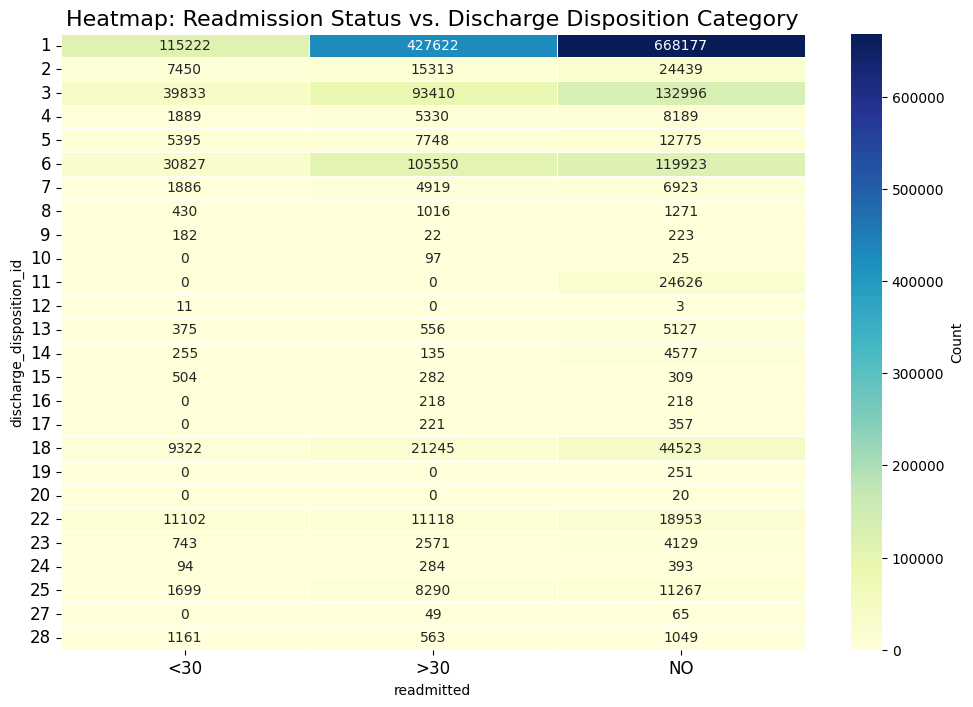

In [26]:
#Contingency/Heatmap Plot for Readmission Status v.s Discharge Diagnosis Category

# Create a contingency table
contingency_table = pd.crosstab(data['discharge_disposition_id'], data['readmitted'])

# Create a heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap with larger boxes vertically
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5, cbar_kws={'label': 'Count'})

# Adjust tick labels size and rotation for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

plt.title('Heatmap: Readmission Status vs. Discharge Disposition Category', fontsize=16)

plt.show()

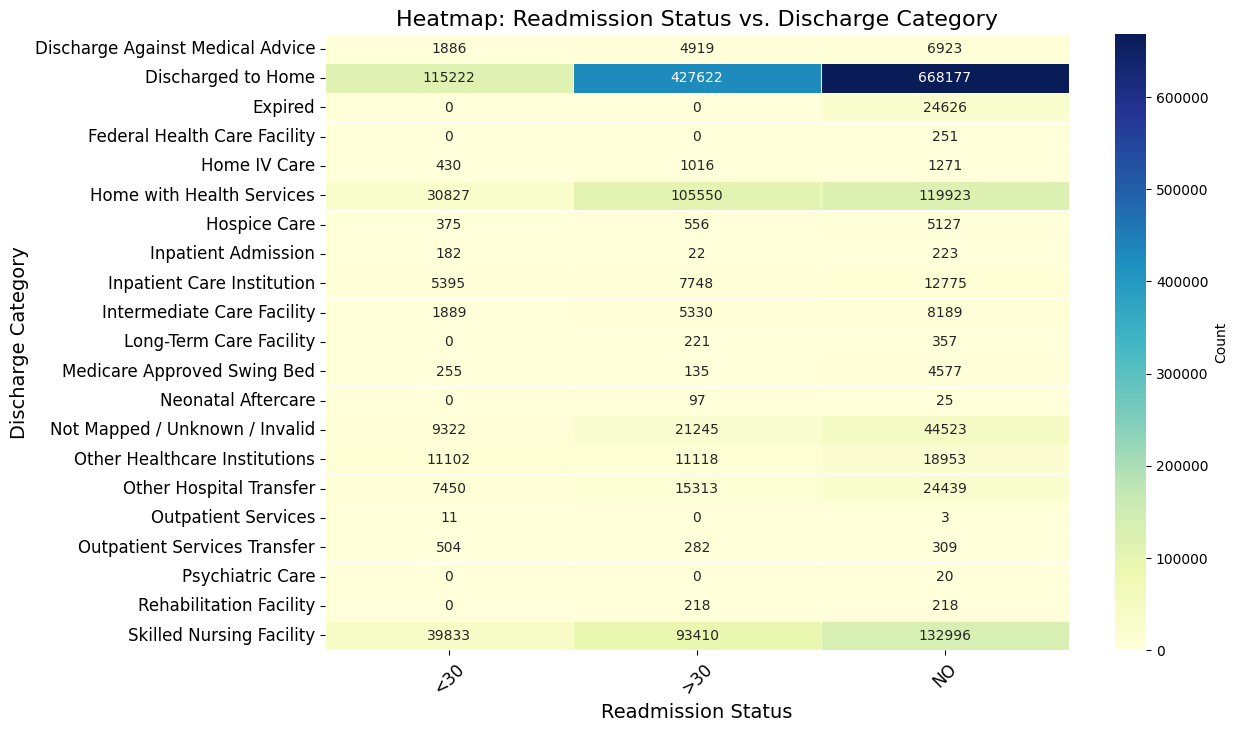

In [27]:
# Mapping discharge disposition IDs to descriptive categories
discharge_mapping = {
    1: 'Discharged to Home',
    2: 'Other Hospital Transfer',
    3: 'Skilled Nursing Facility',
    4: 'Intermediate Care Facility',
    5: 'Inpatient Care Institution',
    6: 'Home with Health Services',
    7: 'Discharge Against Medical Advice',
    8: 'Home IV Care',
    9: 'Inpatient Admission',
    10: 'Neonatal Aftercare',
    11: 'Expired',
    12: 'Outpatient Services',
    13: 'Hospice Care',
    14: 'Medicare Approved Swing Bed',
    15: 'Outpatient Services Transfer',
    16: 'Rehabilitation Facility',
    17: 'Long-Term Care Facility',
    18: 'Not Mapped / Unknown / Invalid',
    19: 'Federal Health Care Facility',
    20: 'Psychiatric Care',
    21: 'Critical Access Hospital',
    22: 'Other Healthcare Institutions',
}

#for key, value in discharge_mapping.items():
#    print(f"{key}: {value}")

# Apply the mapping to create a new column 'discharge_category'
data['discharge_category'] = data['discharge_disposition_id'].map(discharge_mapping)

# Create a contingency table
contingency_table = pd.crosstab(data['discharge_category'], data['readmitted'])

# Create a heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap with larger boxes vertically
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5, cbar_kws={'label': 'Count'})

# Adjust tick labels size and rotation for better readability
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

plt.title('Heatmap: Readmission Status vs. Discharge Category', fontsize=16)
plt.xlabel('Readmission Status', fontsize=14)
plt.ylabel('Discharge Category', fontsize=14)

plt.show()


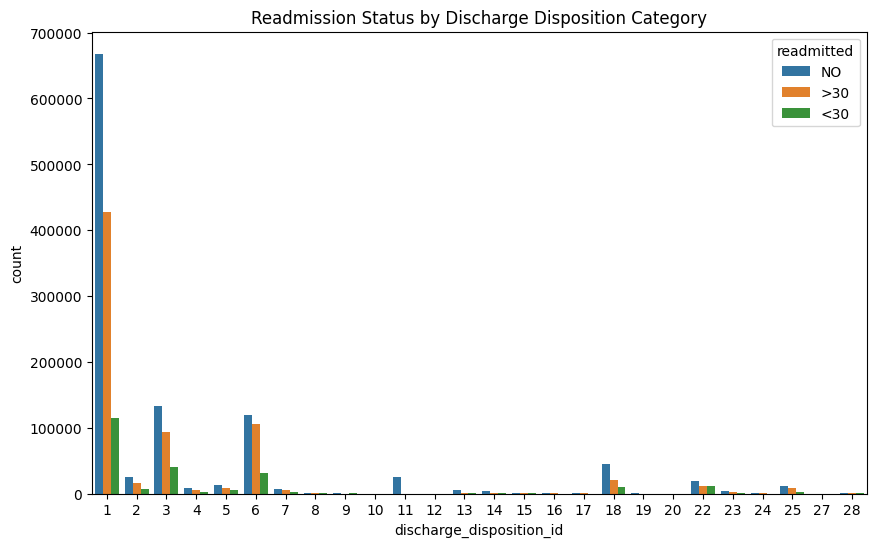

In [28]:
# Create a figure with a count plot for Readmission Status by Discharge Disposition Category
plt.figure(figsize=(10, 6))
sns.countplot(x='discharge_disposition_id', hue='readmitted', data=data)
plt.title('Readmission Status by Discharge Disposition Category')
plt.show()

<Figure size 1500x800 with 0 Axes>

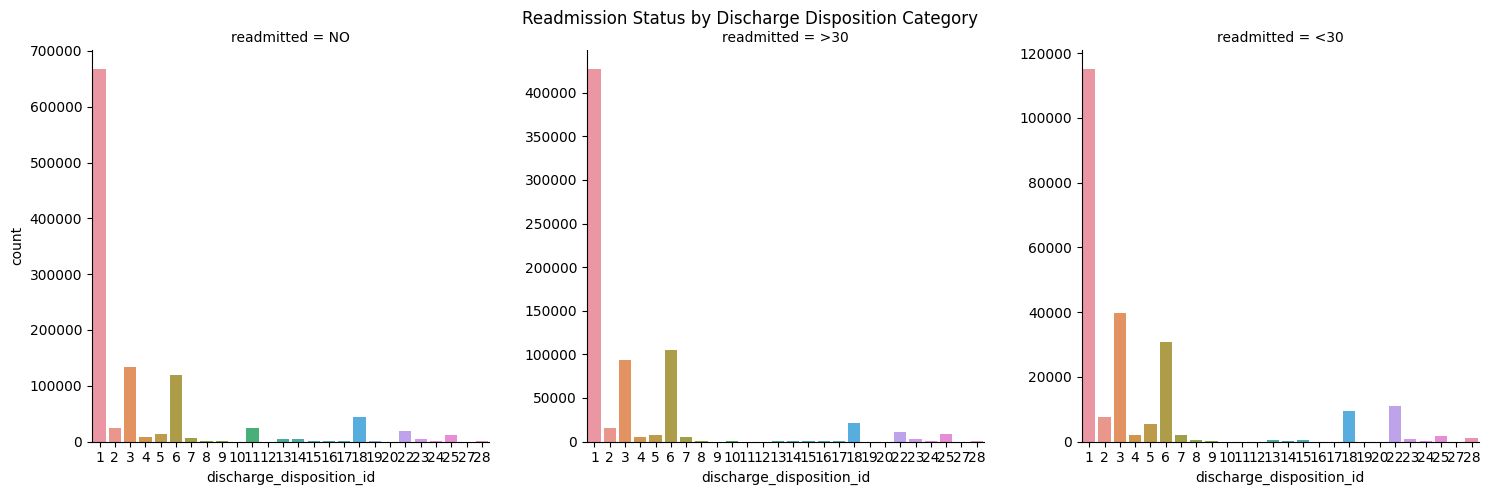

In [29]:
#Facet Grid Counplot for Readmission Status by Discharge Disposition Category
# Assuming 'readmitted' is a column in your 'data' DataFrame
plt.figure(figsize=(15, 8))
g = sns.catplot(
    x='discharge_disposition_id',
    col='readmitted',
    col_wrap=3,  # Adjust the number of columns as needed
    height=5,
    sharey=False,
    kind='count',
    data=data,
)

# Add legend
g.add_legend()

# Set main title
g.fig.suptitle('Readmission Status by Discharge Disposition Category')
plt.subplots_adjust(top=0.9)
plt.show()

**Analysis Question:** Are there any relationships between discharge disposition and re-admission? Consider any trends.

**Visualization Design:**
Visualization 1 - Contingency Plot+Heatmap: The analysis starts by creating a contingency table using pd.crosstab, which summarizes the counts of occurrences for each combination of 'discharge_disposition_id' and 'readmitted.' This table forms the basis for the heatmap. The main visualization is a heatmap created using sns.heatmap. The heatmap represents the contingency table, with each cell color indicating the count of occurrences for a specific combination of 'discharge_disposition_id' and 'readmitted.' Overall, the design choice of a heatmap is effective for visually summarizing the relationships between two categorical variables. The annotations provide concrete counts, allowing for a more detailed interpretation of the patterns in the data.

Visualization 2 - Contingency Plot+Heatmap:a second Contingency Plot+Heatmap was made after reviewing visualization 1. In this second plot, similar dispositions were grouped into more general categories. This allowed us to see which discharge locations had the highest readmission rates. The main visualization is a heatmap created using sns.heatmap. The heatmap represents the contingency table, with each cell color indicating the count of occurrences for a specific combination of 'discharge_disposition_id' and 'readmitted.' Overall, the design choice of a heatmap is effective for visually summarizing the relationships between two categorical variables. The annotations provide concrete counts, allowing for a more detailed interpretation of the patterns in the data.

Visualization 3 - Bar Chart/Countplot: The main visualization is a countplot created using sns.countplot. This type of plot is suitable for comparing the counts of different categories within a single categorical variable ('discharge_disposition_id') while distinguishing counts based on another categorical variable ('readmitted') through color. The 'discharge_disposition_id' variable is represented on the x-axis. Each unique value in this variable will have its own bar, depicting the count of occurrences for each category. The 'readmitted' variable is represented by the hue parameter, which colors the bars differently based on the different levels of 'readmitted.' This allows for a visual comparison of readmission status within each discharge disposition category. This visualization allows for a quick comparison of the distribution of readmission status within each discharge disposition category. It is effective for understanding how readmission status varies across different discharge categories, providing insights into potential patterns or trends in the data.

Visualization 4 - Facet Grid (Alternative View for Vis 2): This visualization design effectively presents the distribution of 'discharge_disposition_id' within different levels of 'readmitted.' It allows for a quick and straightforward comparison of counts across various categories and readmission statuses.

**Analysis:**
Visualization 1 and - Contingency Plot+Heatmap: The highest count, 33,115, is found under No for readmission and discharge disposition id 1, which corresponds to Discharged to Home (refer to the discharge category table). Therefore, most of the patients who were discharged to home were not readmitted. However, most patients re-admitted over 30 days after initial admission were discharged to home.

Visualization 3 and 4 - Bar Chart/Countplot + Facet Grid: This plot provides an alternative view of the number of readmissions per discharge disposition. It allows approximations of the counts and a better view of trends, depending on the audience it is catering to. Here, it is easier to identify the discharge dispositions with the lowest overall counts, such as discharge disposition id 28, which corresponds to "Discharged/transferred/referred to a psychiatric hospital of a psychiatric distinct part unit of a hospital." Visualization 3 separates into three plots for each readmission status but stays in one figure.

# Hypothesis: Gender may play a role in influencing the likelihood of hospital readmission among patients with Diabetes. This study explores whether gender differences are associated with differing rates of hospital readmissions.

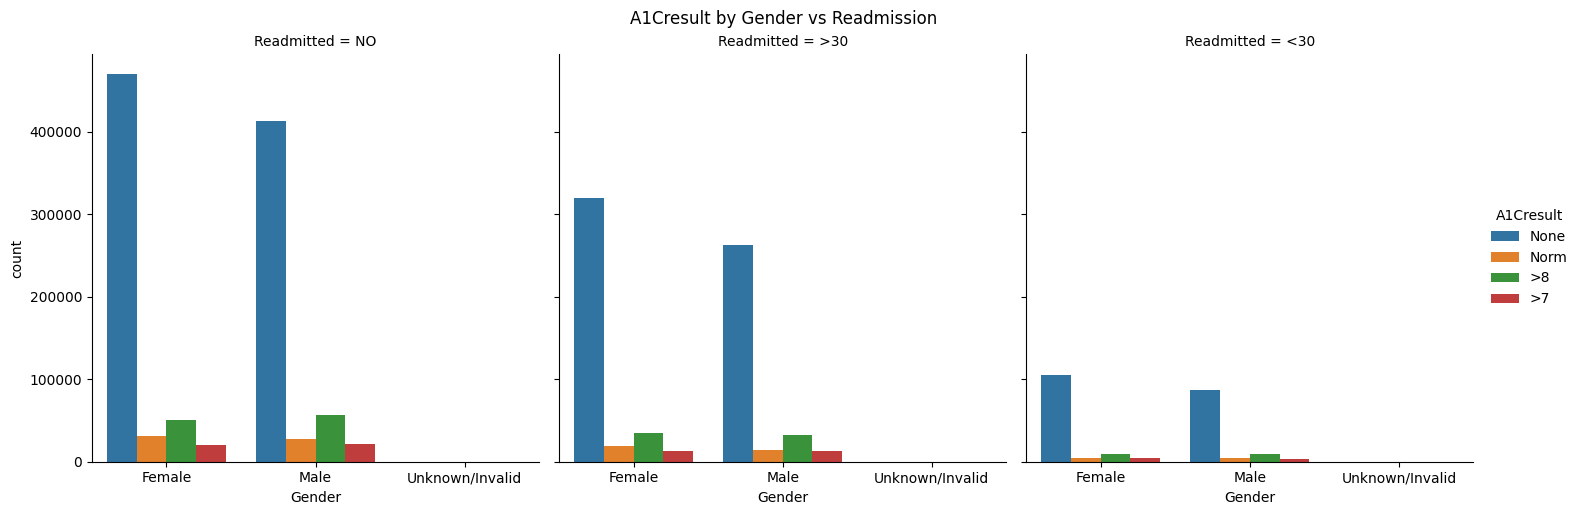

In [30]:
# Visualization for gender and A1Cresult against readmission
data['Gender'] = data['gender']
data['Readmitted'] = data['readmitted']
# Now use data['Gender'] for your plot
sns.catplot(x='Gender', hue='A1Cresult', col='Readmitted', kind='count', data=data)
plt.suptitle('A1Cresult by Gender vs Readmission', y=1.02)
plt.show()

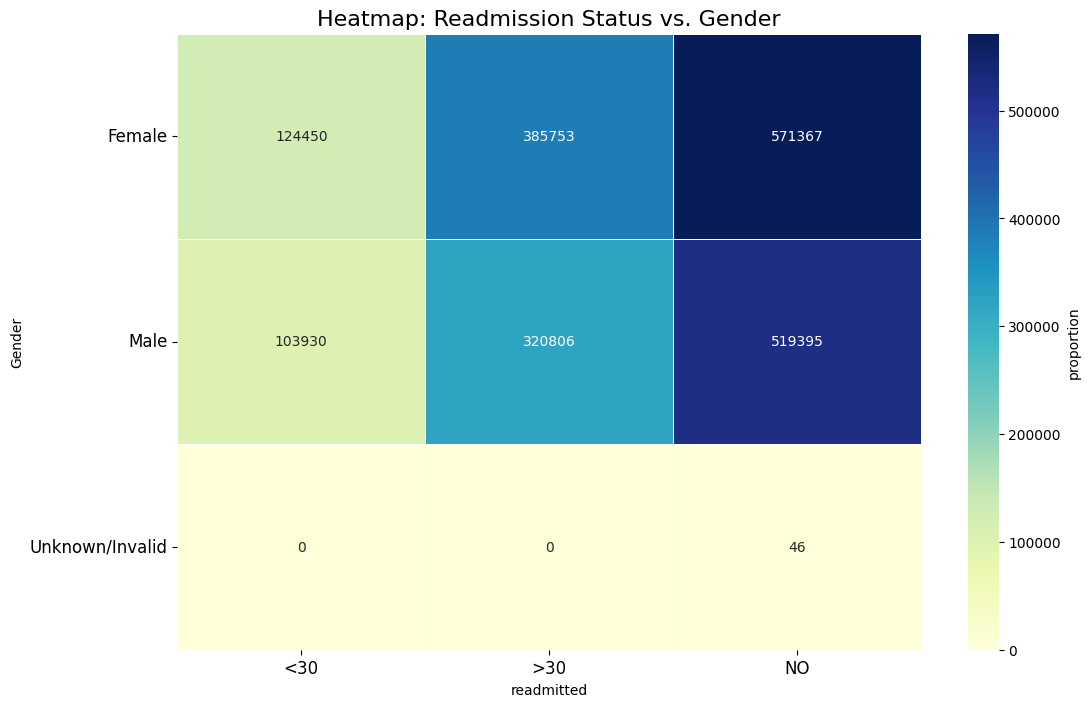

In [31]:
# Create a contingency table
contingency_table = pd.crosstab(data['Gender'], data['readmitted'])

# Create a heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap with larger boxes vertically
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5, cbar_kws={'label': 'proportion'})

# Adjust tick labels size and rotation for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

plt.title('Heatmap: Readmission Status vs. Gender', fontsize=16)

plt.show()

In [32]:
count_data = data.groupby(['gender', 'readmitted']).size().reset_index(name='count')
count_data = count_data.sort_values(by=['gender', 'readmitted'])
# Calculate the proportion within each gender category
count_data['proportion'] = count_data.groupby('gender')['count'].transform(lambda x: x / x.sum())

In [33]:
# Create Altair chart
chart = alt.Chart(count_data).mark_bar().encode(
    x=alt.X('proportion:Q', title='Proportion'),
    y=alt.Y('gender:N', title='Gender'),
    color='readmitted:N',
    tooltip=['race:N', 'readmitted:N', 'count:Q']
).properties(
    title='Proportional Distribution of Each Gender by Readmission Status'
)

# Display the chart
chart

alt.Chart(...)

**Analysis Question:** How does gender influence hospital readmission rates among diabetic patients?

**Visualization Design:** Visualization 1 -is a categorical plot that shows the relationship between readmission status, gender, and A1C result. This chart offers a visual representation of A1C Values plotted vs gender. Each of the three graphs represents an admission status. A1C values are colored based on the available information in the dataset. Visualization 2 - is a heatmap that shows the proportions of readmission status as they relate to different genders. This graph will help us highlight potential differences between genders being readmitted. Visualization 3 - is a stacked horizontal bar chart. This will allow us to see the distribution of each gender by readmission status. This will enable us to compare and analyze readmission trends.

**Analysis:**
Visualization 1 - In a categorical plot, A balanced distribution is observed between male and female patients for readmission within 30 days post-discharge. Females show a slightly higher proportion of readmitted after 30 days compared to males. Notably, more males exhibited no readmissions, contributing to a higher count of patients with no subsequent admissions.
Visualization 2 - in the heatmap, both genders represent over half of the patients without readmissions, signifying substantial successful post-discharge outcomes. Gender-specific differences in readmission patterns suggest potential variations in healthcare needs and outcomes between male and female patients. Higher proportions of females readmitted after 30 days may signify prolonged health challenges requiring extended care compared to males.
Visualization 3 -The bar graph demonstrates the proportional distribution of readmission status for each gender, enabling easy comparison and analysis of readmission trends.
Provides a clear visual representation of the differences in readmission status among males and females, emphasizing gender-specific disparities in healthcare outcomes.

